In [1]:
# Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

# Base.classes.keys()

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
jun_temps = session.query(Measurement).filter(extract('month', Measurement.date) == 6)

In [5]:
#  3. Convert the June temperatures to a list.
jun_temps_list = [temp.tobs for temp in jun_temps]

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
jun_temps_df = pd.DataFrame(jun_temps_list, columns=['June Temps'])

In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
jun_temps_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = session.query(Measurement).filter(extract('month', Measurement.date) == 12)

In [9]:
# 7. Convert the December temperatures to a list.
dec_temps_list = [temp.tobs for temp in dec_temps]

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_temps_list, columns=['December Temps'])

In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## D3: Additional queries / graphs

(55.0, 90.0)

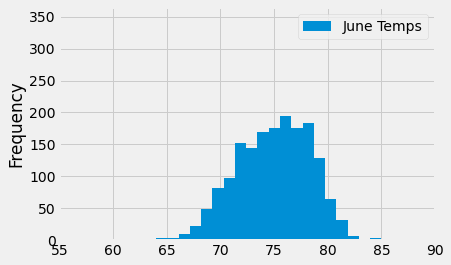

In [12]:
# Plot June Temps
jun_temps_df.plot.hist(bins=20).set_ylim(0,365)
plt.xlim(55,90)

(55.0, 90.0)

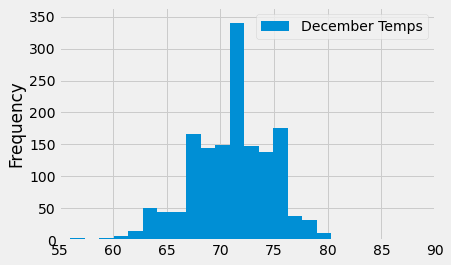

In [13]:
# Plot December Temps
dec_temps_df.plot.hist(bins=20).set_ylim(0,365)
plt.xlim(55,90)

Text(0.5, 0, 'Rain in Inches')

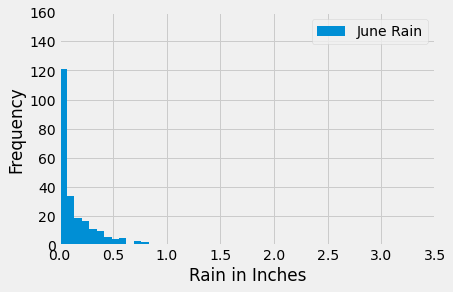

In [16]:
# June rain query
jun_rain = session.query(Measurement.prcp).filter(extract('month', Measurement.date) == 6).\
filter(Measurement.station == 'USC00519281')

# Convert to list
jun_rain_list = [precip.prcp for precip in jun_rain]

# Create DF
jun_rain_df = pd.DataFrame(jun_rain_list, columns=['June Rain'])

# Plot June rain
jun_rain_df.plot.hist(bins=20).set_ylim(0,160)
plt.xlim(0,3.5)
plt.xlabel('Rain in Inches')

Text(0.5, 0, 'Rain in Inches')

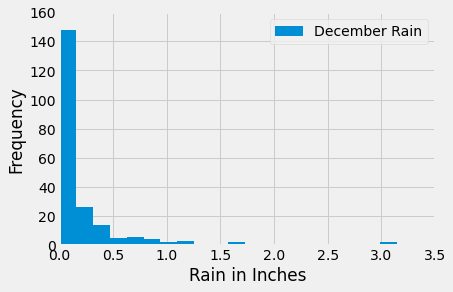

In [17]:
# Dec rain query
dec_rain = session.query(Measurement.prcp).filter(extract('month', Measurement.date) == 12).\
filter(Measurement.station == 'USC00519281')

# Convert to list
dec_rain_list = [precip.prcp for precip in dec_rain]

# Create DF
dec_rain_df = pd.DataFrame(dec_rain_list, columns=['December Rain'])

# Plot December rain
dec_rain_df.plot.hist(bins=20).set_ylim(0,160)
plt.xlim(0,3.5)
plt.xlabel('Rain in Inches')